# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# GET a sample of the api call - "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
sample_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q=Cambridge"
sample = requests.get(sample_url).json()
pprint(sample)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 43.3601, 'lon': -80.3127},
 'dt': 1732829321,
 'id': 5913695,
 'main': {'feels_like': 270.58,
          'grnd_level': 974,
          'humidity': 64,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 275.36,
          'temp_max': 275.36,
          'temp_min': 275.11},
 'name': 'Cambridge',
 'sys': {'country': 'CA',
         'id': 836,
         'sunrise': 1732797078,
         'sunset': 1732830474,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 295, 'gust': 7.68, 'speed': 5.84}}


In [5]:
# Set the API base URL
# using API call = "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"

url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval (aproxx runtime 12 mins)")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f"Data Retrieval Completed at EST {timestamp}")
print("-----------------------------")

Beginning Data Retrieval (aproxx runtime 12 mins)
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | karratha
Processing Record 8 of Set 1 | high rock
Processing Record 9 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | chonchi
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | san isidro
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | nuuk
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | gebeit
Processing Record 21 of Set 1 | 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,301.40,72,80,9.50,MH,1732829469
1,east london,-33.0153,27.9116,290.01,74,38,5.52,ZA,1732829470
2,hermanus,-34.4187,19.2345,289.15,74,18,4.86,ZA,1732829471
3,wailua homesteads,22.0669,-159.3780,299.59,69,40,6.17,US,1732829473
4,west island,-12.1568,96.8225,300.14,94,75,3.60,CC,1732829474


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,301.40,72,80,9.50,MH,1732829469
1,east london,-33.0153,27.9116,290.01,74,38,5.52,ZA,1732829470
2,hermanus,-34.4187,19.2345,289.15,74,18,4.86,ZA,1732829471
3,wailua homesteads,22.0669,-159.3780,299.59,69,40,6.17,US,1732829473
4,west island,-12.1568,96.8225,300.14,94,75,3.60,CC,1732829474


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

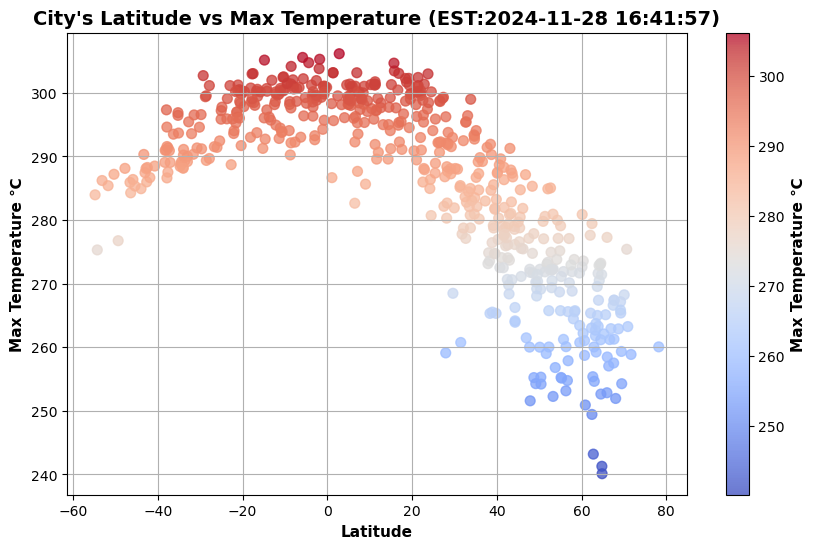

In [11]:
# Build scatter plot for latitude vs. temperature

# Set figure size
plt.figure(figsize=(10, 6)) 
plt.grid()

# Use a colormap to represent temperature values
plot_temp = plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], s=50, c=city_data_df['Max Temp'], cmap='coolwarm', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City's Latitude vs Max Temperature (EST:{timestamp})", fontweight='bold', fontsize=14)
plt.xlabel("Latitude", fontweight='bold', fontsize=11)
plt.ylabel("Max Temperature \u2103", fontweight='bold', fontsize=11)

# Add a color bar to show the temperature scale
cbar = plt.colorbar(plot_temp)
cbar.set_label('Max Temperature \u2103', fontweight='bold', fontsize=11)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

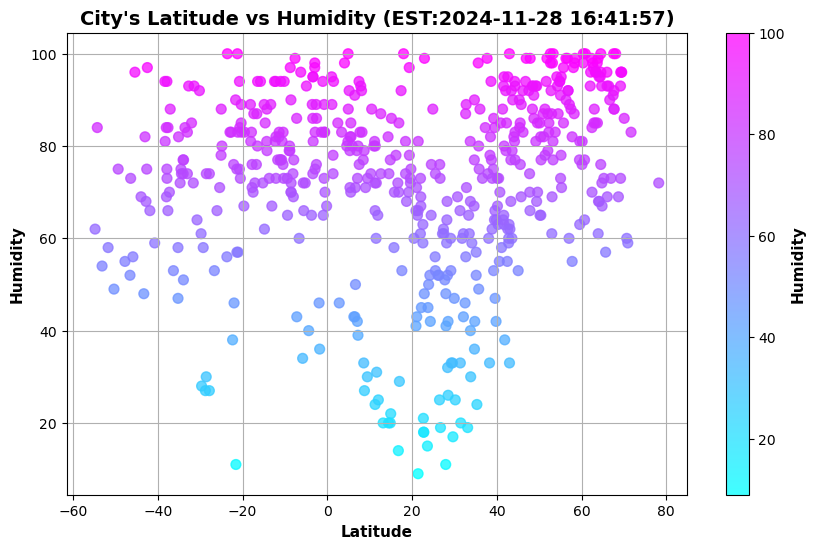

In [12]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(10, 6)) 
plt.grid()

# Use a colormap to represent temperature values
plot_humid = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], s=50, c=city_data_df['Humidity'], cmap='cool', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City's Latitude vs Humidity (EST:{timestamp})", fontweight='bold', fontsize=14)
plt.xlabel("Latitude", fontweight='bold', fontsize=11)
plt.ylabel("Humidity", fontweight='bold', fontsize=11)

# Add a color bar to show the temperature scale
cbar = plt.colorbar(plot_humid)
cbar.set_label('Humidity', fontweight='bold', fontsize=11)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

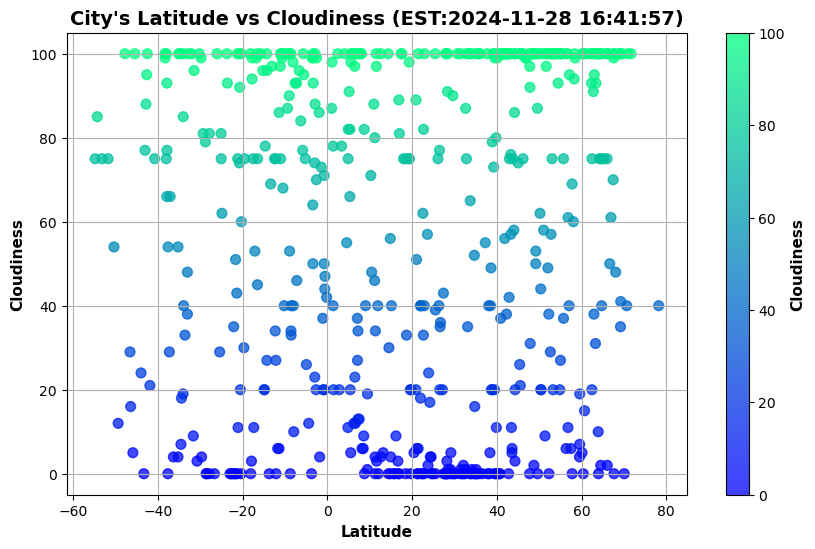

In [13]:
# Build the scatter plots for latitude vs. cloudiness

plt.figure(figsize=(10, 6)) 
plt.grid()

# Use a colormap to represent temperature values
plot_clouds = plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], s=50, c=city_data_df['Cloudiness'], cmap='winter', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City's Latitude vs Cloudiness (EST:{timestamp})", fontweight='bold', fontsize=14)
plt.xlabel("Latitude", fontweight='bold', fontsize=11)
plt.ylabel("Cloudiness", fontweight='bold', fontsize=11)

# Add a color bar to show the temperature scale
cbar = plt.colorbar(plot_clouds)
cbar.set_label('Cloudiness', fontweight='bold', fontsize=11)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

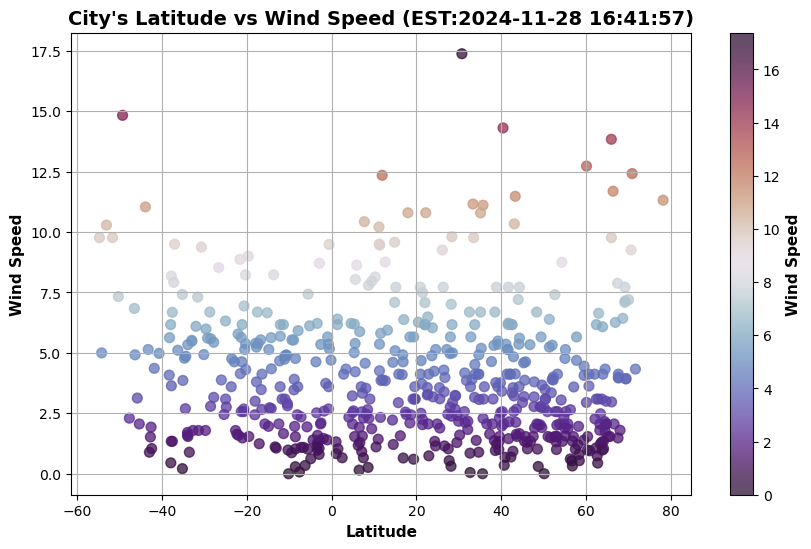

In [14]:
# Build the scatter plots for latitude vs. wind speed

plt.figure(figsize=(10, 6)) 
plt.grid()

# Use a colormap to represent temperature values
plot_wind = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], s=50, c=city_data_df['Wind Speed'], cmap='twilight_shifted', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City's Latitude vs Wind Speed (EST:{timestamp})", fontweight='bold', fontsize=14)
plt.xlabel("Latitude", fontweight='bold', fontsize=11)
plt.ylabel("Wind Speed", fontweight='bold', fontsize=11)

# Add a color bar to show the temperature scale
cbar = plt.colorbar(plot_wind)
cbar.set_label('Wind Speed', fontweight='bold', fontsize=11)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


C:\Users\Saurabh Lakhanpal\AppData\Local\Temp\ipykernel_20848\3990625616.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regression_stats = pd.concat([regression_stats, stats], ignore_index=True)


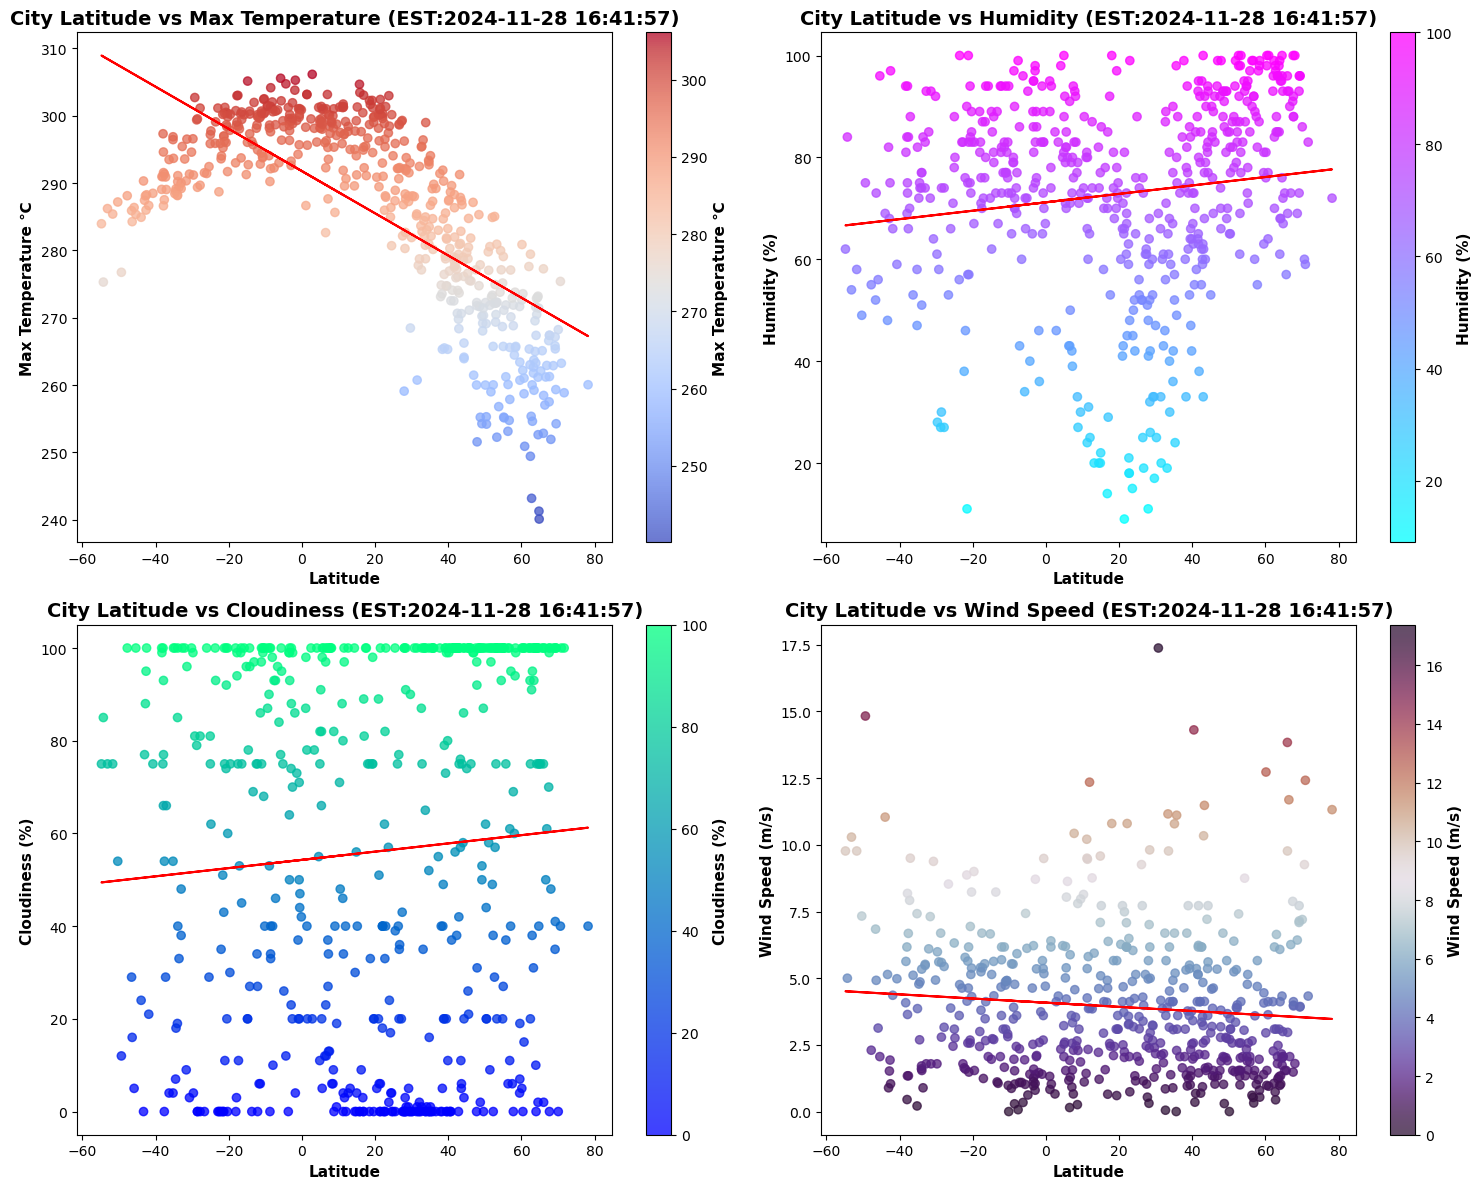

,Title,Slope,Intercept,R-squared,P-value,Standard Error
0,City Latitude vs Max Temperature,-0.313182,291.771781,0.502409,0.000000,0.013230
1,City Latitude vs Humidity,0.082678,71.183853,0.018035,0.001489,0.025896
2,City Latitude vs Cloudiness,0.088773,54.296896,0.005208,0.088826,0.052078
3,City Latitude vs Wind Speed,-0.007803,4.081673,0.008516,0.029428,0.003574


In [15]:
# Define a function to create Linear Regression plots

def plot_all_relationships(city_data_df, timestamp):

    # List of relationships to analyze
    relationships = [
        ('Lat', 'Max Temp', "Latitude", "Max Temperature \u2103", "City Latitude vs Max Temperature", 'coolwarm'),
        ('Lat', 'Humidity', "Latitude", "Humidity (%)", "City Latitude vs Humidity", 'cool'),
        ('Lat', 'Cloudiness', "Latitude", "Cloudiness (%)", "City Latitude vs Cloudiness", 'winter'),
        ('Lat', 'Wind Speed', "Latitude", "Wind Speed (m/s)", "City Latitude vs Wind Speed", 'twilight_shifted')
    ]

    # Create a DataFrame to store regression statistics
    regression_stats = pd.DataFrame(columns=["Title", "Slope", "Intercept", "R-squared", "P-value", "Standard Error"])

    # Create a 2x2 grid for the plots
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))

    # Flatten the array of axes for easy iteration
    axs = axs.flatten()

    # Loop through each relationship and create the plots
    for i, (x_col, y_col, x_label, y_label, title, color_map) in enumerate(relationships):
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(city_data_df[x_col], city_data_df[y_col])
        
        # Create scatter plot
        scatter = axs[i].scatter(city_data_df[x_col], city_data_df[y_col], c=city_data_df[y_col], cmap=color_map, alpha=0.75)
        
        # Plot regression line
        regression_line = slope * city_data_df[x_col] + intercept
        axs[i].plot(city_data_df[x_col], regression_line, color='red')
        
        # Incorporate other graph properties
        axs[i].set_title(f"{title} (EST:{timestamp})", fontweight='bold', fontsize=14)
        axs[i].set_xlabel(x_label, fontweight='bold', fontsize=11)
        axs[i].set_ylabel(y_label, fontweight='bold', fontsize=11)
        
        # Add color bar
        cbar = fig.colorbar(scatter, ax=axs[i])
        cbar.set_label(y_label, fontweight='bold', fontsize=11)
        
        # Store regression statistics in the DataFrame
        stats = pd.DataFrame({
            "Title": [title],
            "Slope": [slope],
            "Intercept": [intercept],
            "R-squared": [r_value**2],
            "P-value": [round(p_value,8)],
            "Standard Error": [std_err]
        })
        regression_stats = pd.concat([regression_stats, stats], ignore_index=True)

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    plt.savefig("output_data/All_Plots.png")

    # Show plot
    plt.show()

    # Display the regression statistics DataFrame
    return regression_stats

# use the function to plot the graphs
plot_all_relationships(city_data_df, timestamp)



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,301.40,72,80,9.50,MH,1732829469
3,wailua homesteads,22.0669,-159.3780,299.59,69,40,6.17,US,1732829473
7,high rock,26.6208,-78.2833,298.63,73,35,1.15,BS,1732829477
8,udachny,66.4167,112.4000,257.05,93,100,11.69,RU,1732829479
10,thompson,55.7435,-97.8558,261.24,85,75,2.06,CA,1732829186


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,east london,-33.0153,27.9116,290.01,74,38,5.52,ZA,1732829470
2,hermanus,-34.4187,19.2345,289.15,74,18,4.86,ZA,1732829471
4,west island,-12.1568,96.8225,300.14,94,75,3.60,CC,1732829474
5,port-aux-francais,-49.3500,70.2167,276.75,75,12,14.83,TF,1732829475
6,karratha,-20.7377,116.8463,300.50,75,74,2.68,AU,1732829476


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


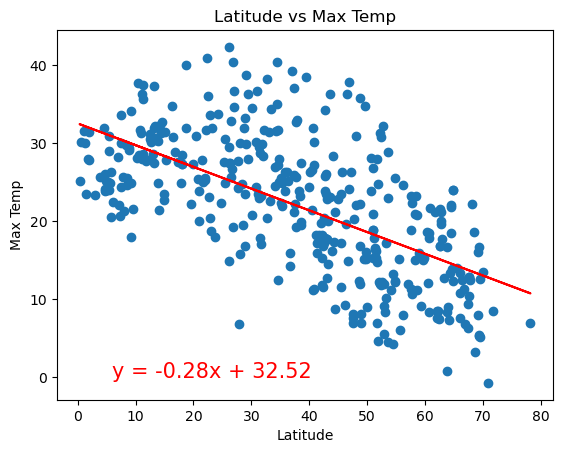

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.6720220238897325


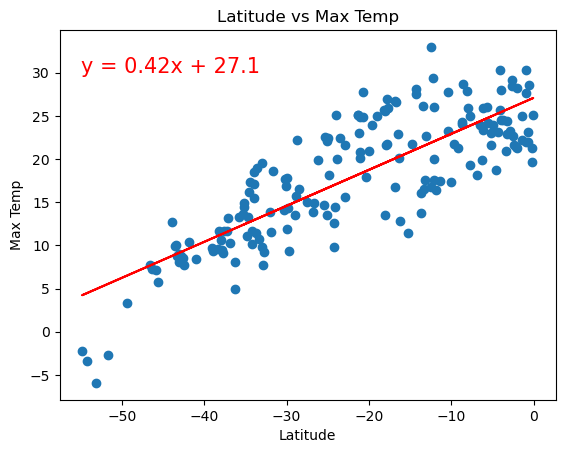

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


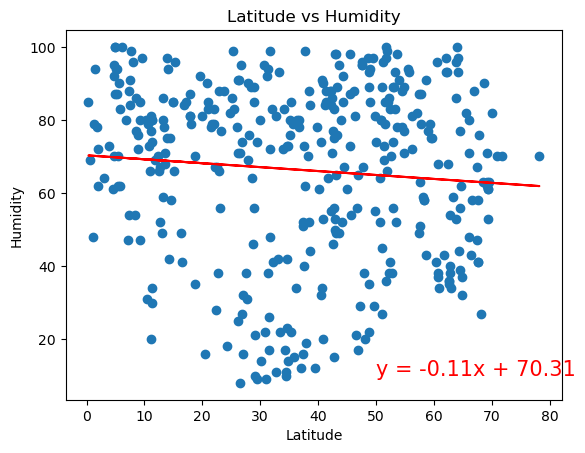

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


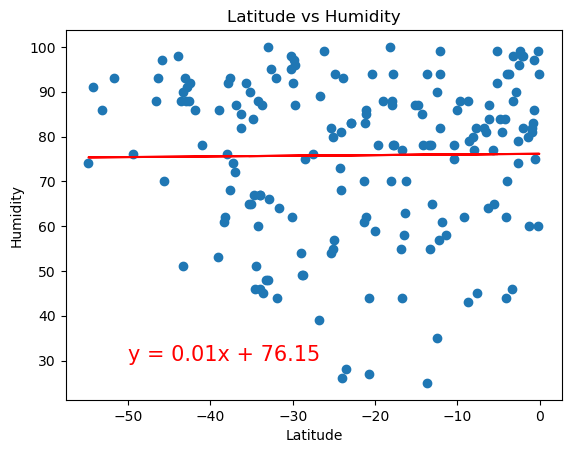

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


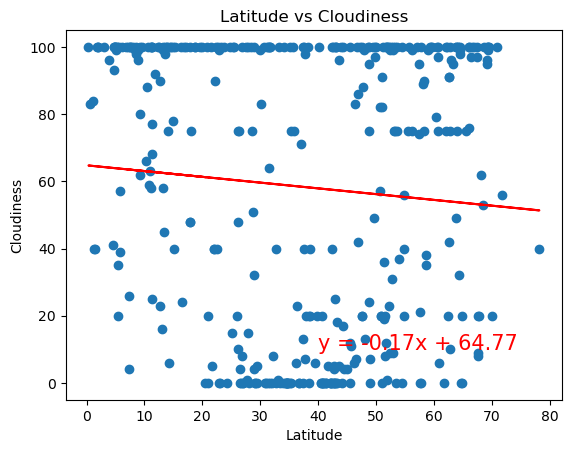

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


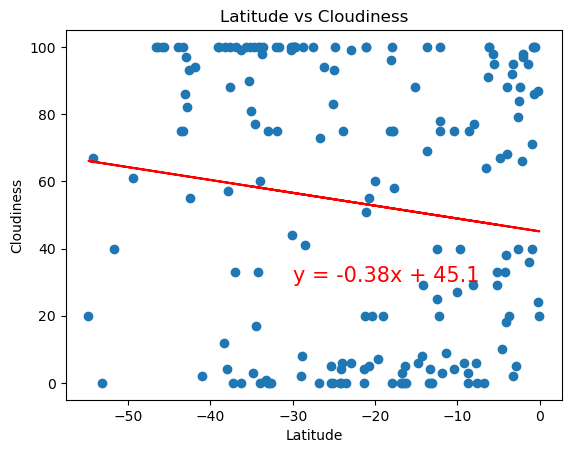

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


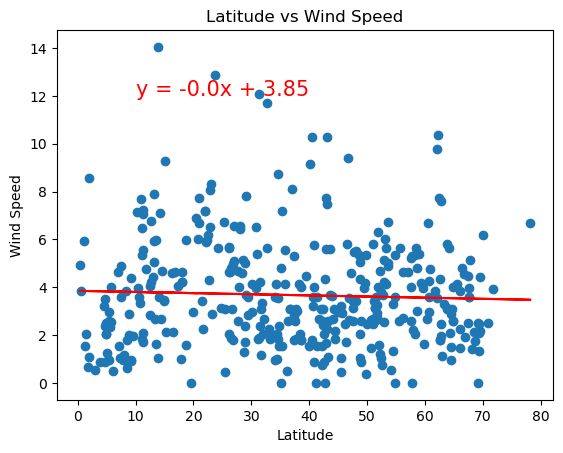

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


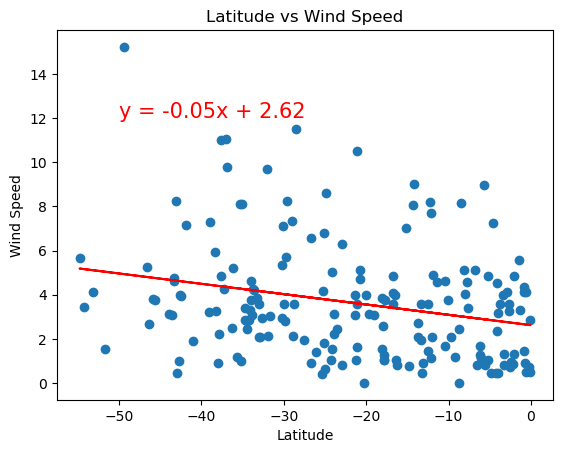

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE